# Recommendation Engine To Recommend Songs To Users 

In [1]:
## importing data manipulation libraries # used nmf netflix concept in this project ## metrix factorisation

import pandas as pd 
import numpy as np 

from sklearn.decomposition import NMF 

In [2]:
df = pd.read_csv("spotify.xls",index_col=0)
df 

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_996,8,0,11,10,1,10,13,13,10,6,...,10,0,8,4,0,7,13,7,2,6
user_997,7,6,9,6,15,6,14,2,9,7,...,15,9,2,2,6,1,0,5,15,11
user_998,6,2,1,5,1,7,2,4,4,0,...,0,13,6,13,0,1,11,13,6,13
user_999,7,0,8,12,6,2,6,2,0,12,...,14,7,12,3,5,15,5,11,9,12


In [3]:
## in the above dataset we have 1000 users and 5000 songs

x= df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [4]:
nmf = NMF(n_components=100, max_iter=1000, random_state= 100) 

In [5]:
nmf.fit(x) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(max_iter=1000, n_components=100, random_state=100)

In [6]:
user_matrix = nmf.transform(x) 

In [7]:
song_matrix = nmf.components_.T

In [8]:
user_matrix.shape

(1000, 100)

In [9]:
song_matrix.shape 

(5000, 100)

In [10]:
user_matrix[0] 

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.17850422e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.07864406e+00, 0.00000000e+00,
       0.00000000e+00, 2.84246884e+00, 2.78934884e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.84705329e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.01351331e-01, 1.58676440e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.43070113e+00,
       0.00000000e+00, 1.05051207e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.42758369e+00,
       7.23212136e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.08594340e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.63032221e-01, 2.86090825e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.22328857e-01,
       1.62147695e-01, 6.16924443e-01, 0.00000000e+00, 2.42590672e+00,
      

## building recommendation system method 1 

In [11]:
#1. consider recommending songs to base user number 1 who is at row loaction 0 
#2. Find the eucledian distance between the base user number1 and the reamaining 999 users.
#3. Find out the top 10 songs heard by 5 closest users.
#4. Recoomend those songs to base user number 1.

### finding the eucledian distance between two users 

In [12]:
def cal_distance(u1,u2):
    return pow(sum([pow(u1[x] - u2[x],2) for x in range(len(u1))]),0.5) 

In [13]:
cal_distance(user_matrix[0],user_matrix[1]) 

12.962015431699726

### caluclating the distance between the base user and the remaining 999 users 

In [14]:
def distance_from_base_user(base_user,user_matrix):
    distance = []
    for i in range(len(user_matrix)):
        if base_user != i:
            distance.append(cal_distance(user_matrix[base_user],user_matrix[i]))
    return distance  

In [15]:
distance = distance_from_base_user(0,user_matrix) 

In [16]:
distance 

[12.962015431699726,
 13.206333633293712,
 13.521034985456483,
 13.212861700745657,
 12.181058853544105,
 12.384897606899127,
 13.453586433832859,
 14.820482299413786,
 13.172984474984032,
 12.421626611906927,
 14.275261491249314,
 14.016371813089311,
 12.187362471034442,
 12.670989486075042,
 12.939640183275682,
 12.724895819536716,
 13.698880712520296,
 11.636599247098157,
 12.231781381823918,
 12.298583596015913,
 13.113311269441814,
 12.949253802924307,
 13.38155822467895,
 12.861597195846128,
 14.86073970734058,
 13.663003065303817,
 13.524303255536475,
 12.843624965731951,
 14.262681199295645,
 12.18554689310475,
 12.636021787605987,
 14.312897543627065,
 12.562141307000594,
 12.123859324370493,
 13.76749824036925,
 13.536523280348925,
 15.078685821319887,
 14.269920677890669,
 14.691178125104189,
 11.65969902288394,
 12.80283521168452,
 14.809199243633243,
 12.657280169015772,
 12.749239305116395,
 12.633529539581758,
 12.470674887386018,
 11.068997955959617,
 12.299814286509172

In [17]:
closest_users = np.argsort(distance)[0:5] ## argsort shows the index number 

In [18]:
closest_users 

array([890, 227, 483, 325, 308], dtype=int64)

### finding the songs heard by this closest users 

In [19]:
temp = pd.DataFrame(df.iloc[closest_users]) 

In [20]:
temp  

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_891,12,10,8,0,0,11,8,7,0,15,...,8,3,13,11,14,6,7,9,10,11
user_228,3,6,5,6,12,2,4,14,6,2,...,2,14,12,9,14,3,1,5,6,14
user_484,3,1,13,5,0,8,2,1,4,13,...,11,7,0,14,14,7,9,8,5,7
user_326,4,8,9,4,15,8,14,3,4,12,...,1,15,5,14,5,9,4,0,2,5
user_309,9,10,12,10,9,12,6,9,4,1,...,8,12,12,3,9,7,3,2,10,3


### Picking up the top 5 songs heard by the closest users 

In [21]:
def top_5_songs(closest_users,df):
    temp = df.iloc[closest_users]
    dict1 = temp.max().to_dict() 
    sorted_dict = sorted(dict1.items(),key=lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse=True)[:5]
    return [x[0] for x in sorted_dict] 

In [22]:
top_5_songs(closest_users,df) 

['song_997', 'song_992', 'song_991', 'song_99', 'song_987']

## Recommendation system method 2 (Clustering Method) 

In [23]:
#1.Make clusters of the songs of the universal metrix 
#2.Find out the song mostly heard by the user (Base song)
#3.Find the cluster in which this mostly heard song is a part of
#4.Using n-neighbours algorithm find out songs nearer to the base song
#5.Recommending those near songs to the user 

### using elbow curve to find out best value of k

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors 

In [27]:
wcss = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(song_matrix) 
    wcss[k] = kmeans.inertia_
    

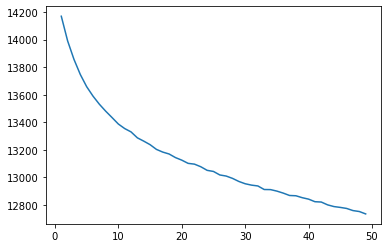

In [30]:
plt.plot(wcss.keys(),wcss.values())

In [58]:
def return_recommended_songs(df,n_cluster,song_matrix,song_name,n_recommendation):
    
    ##making clusters of the songs 
    kmeans = KMeans(n_clusters=n_cluster,max_iter=1000).fit(song_matrix)
    
    
    ##finding the index of the base song
    index_in_song = df.columns.tolist().index(song_name) 
    
    
    ##taking the vectors genrated of the song in the song matrix
    song_vector = song_matrix[index_in_song] 
    
    
    ##applting k_means and predicting the song_matrix
    song_clusters = list(kmeans.predict(song_matrix))
    
    
    ##finding out in which cluster is my base song 
    base_song_cluster = kmeans.predict([song_vector])  
    
    
    ##finding out other songs which are in the same cluster like my base song 
    other_similar_songs = [x for x in range(len(song_clusters)) if song_clusters[x] ==  base_song_cluster] 
    
    
    ##getting the vectors of the songs 
    song_vector = song_matrix[other_similar_songs] 
    
    
    ##fitting NN algorithm 
    nn = NearestNeighbors(n_neighbors=n_recommendation)
    nn.fit(song_vector) 
    recommended_songs = nn.kneighbors([song_matrix[index_in_song]])
    
    
    ##creating list of all the song names 
    col_list = list(df.columns)
    
    
    return [col_list[x] for x in recommended_songs[1][0]] 

In [60]:
 return_recommended_songs(df,12,song_matrix,"song_12",5) 

['song_2', 'song_298', 'song_39', 'song_333', 'song_311']